# Tarea 2 
## Laboratorio de métodos aplicados avanzados
## Integrantes:
* ### Francisca Carolina Jara Yévenes 
* ### Luis Fernando Retamal Fuentes
## Fecha: 5 de octubre de 2022

# Bibliotecas requeridas

In [150]:
%pip install linearmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
import linearmodels.panel as lmp
from numpy import empty
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Lectura de archivo y eliminación de datos faltantes

In [151]:
charls = pd.read_csv('/charls.csv')
charls.dropna(inplace=True)
charls.reset_index(drop=True, inplace=True)
list=[]
for j in range(len(charls)):
  list.append(0)
charls.head(5)


,cesd,child,drinkly,female,hrsusu,hsize,inid,intmonth,married,retired,schadj,urban,wave,wealth,age
0,6,2,0.None,1,0.0,4,1.010410e+10,7,1,0,0,0,1,-5800.0,46
1,7,2,0.None,1,49.0,4,1.010410e+10,7,1,0,0,0,2,100.0,46
2,5,2,0.None,1,56.0,7,1.010410e+10,8,1,0,0,0,3,-59970.0,46
3,0,2,1.Yes,0,63.0,4,1.010410e+10,7,1,0,4,0,1,-5800.0,48
4,5,2,1.Yes,0,49.0,4,1.010410e+10,7,1,0,4,0,2,100.0,48


In [152]:
charls.describe()

,cesd,child,female,hrsusu,hsize,inid,intmonth,married,retired,schadj,urban,wave,wealth,age
count,34371.000000,34371.000000,34371.000000,34371.000000,34371.000000,3.437100e+04,34371.000000,34371.000000,34371.000000,34371.00000,34371.000000,34371.000000,3.437100e+04,34371.000000
mean,8.173606,2.708184,0.537837,27.966476,3.441011,1.768873e+11,7.524745,0.874545,0.283960,4.67749,0.356289,2.000000,9.892309e+03,58.223531
std,6.183766,1.399999,0.498574,28.270626,1.702308,1.063153e+11,0.916180,0.331238,0.450924,3.85762,0.478909,0.816508,9.738829e+04,9.154338
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.010410e+10,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-2.110050e+06,16.000000
25%,3.000000,2.000000,0.000000,0.000000,2.000000,7.400430e+10,7.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000e+00,51.000000
50%,7.000000,2.000000,1.000000,21.000000,3.000000,1.624310e+11,7.000000,1.000000,0.000000,4.00000,0.000000,2.000000,4.000000e+02,58.000000
75%,12.000000,3.000000,1.000000,54.000000,4.000000,2.811160e+11,8.000000,1.000000,1.000000,8.00000,1.000000,3.000000,5.000000e+03,64.000000
max,30.000000,11.000000,1.000000,168.000000,16.000000,3.477630e+11,12.000000,1.000000,1.000000,18.00000,1.000000,3.000000,9.902500e+06,97.000000


## Variables
* **INID**: identificador único
* **wave**: periodo de la encuesta (1-3)
* **cesd**: puntaje en la escala de salud mental (0-30)
* **child**: numero de hijos
* **drinkly**: bebió alcohol en el último mes (binario)
* **hrsusu**: horas promedio trabajo semanal
* **hsize**: tamaño del hogar
* **intmonth**: mes en que fue encuestado/a (1-12)
* **married**: si está casado/a (binario)
* **retired**: si está pensionado/a (binario)
* **schadj**: años de escolaridad
* **urban**: zona urbana (binario)
* **wealth**: riqueza neta (miles RMB)
* **age**: edad al entrar a la encuesta (no varía entre periodos)





## Datatype

Para detectar el tipo de dato presente en el archivo se utiliza un atributo de pandas. 

In [153]:
charls.dtypes 

cesd          int64
child         int64
drinkly      object
female        int64
hrsusu      float64
hsize         int64
inid        float64
intmonth      int64
married       int64
retired       int64
schadj        int64
urban         int64
wave          int64
wealth      float64
age           int64
dtype: object

In [154]:
charls['inid'] = charls['inid'].astype(np.int64) #Para que no se muestre en notación científica el identiificador único

Dado que drinkly es una variable binaria para un mejor análisis se procede a convertir sus datos a datos enteros utilizando una lista de python. 


In [155]:
for i in range(0,len(charls)):
  if (charls.iloc[i,2]=='0.None'):
    list[i]=int(0)
  else: list[i]=int(1)

charls=charls.drop(['drinkly'], axis=1)
charls.insert(2, "drinkly", list, True) 
charls.head(5)

,cesd,child,drinkly,female,hrsusu,hsize,inid,intmonth,married,retired,schadj,urban,wave,wealth,age
0,6,2,0,1,0.0,4,10104101001,7,1,0,0,0,1,-5800.0,46
1,7,2,0,1,49.0,4,10104101001,7,1,0,0,0,2,100.0,46
2,5,2,0,1,56.0,7,10104101001,8,1,0,0,0,3,-59970.0,46
3,0,2,1,0,63.0,4,10104101002,7,1,0,4,0,1,-5800.0,48
4,5,2,1,0,49.0,4,10104101002,7,1,0,4,0,2,100.0,48


Se analiza el tipo de dato presente en el dataframe

In [156]:
charls.dtypes #muestra el tipo de dato

cesd          int64
child         int64
drinkly       int64
female        int64
hrsusu      float64
hsize         int64
inid          int64
intmonth      int64
married       int64
retired       int64
schadj        int64
urban         int64
wave          int64
wealth      float64
age           int64
dtype: object

In [157]:
ch= charls ##copia del dataframe 

En el **anexo 1** se muestran los histogramas de las diversas variables incluidas en el dataframe, para observar las distribuciones de cada una de ellas. 

## Outliers

Para analizar los outliers se procede a mostrar un gráfico de cajas con las variables del Dataframe.


Text(0.5, 1.0, 'Análisis outliers dataframe')

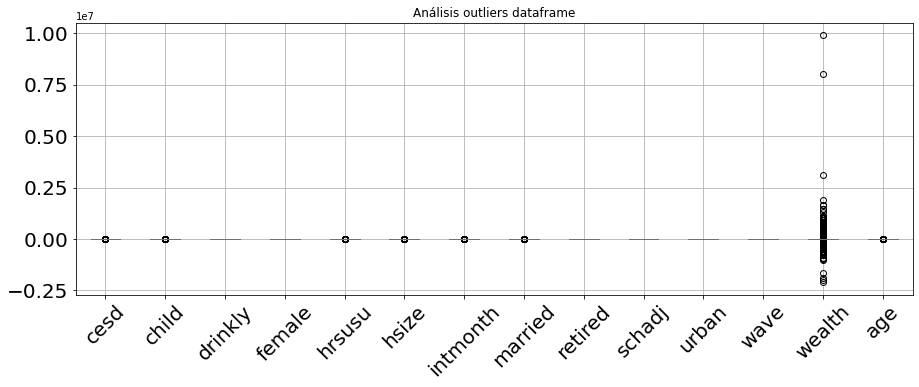

In [158]:
c=charls.drop(['inid'], axis=1) #se omite la variable inid en la representación gráfica
boxplot = c.boxplot(grid=True,rot=45, fontsize=20,figsize =(15, 5))
plt.title('Análisis outliers dataframe')

Se analizan las variables con más puntos atípicos. En este caso, evidentemente, la variable **wealth**. En el **anexo 2** se presentan gráficos de caja para cada una de las variables. Posteriormente se eliminan aquellos puntos atípicos para producir un mejor modelo. 


In [159]:
charls = charls.drop(charls[charls['wealth']>1.112e+06].index)
charls = charls.drop(charls[charls['wealth']<-1e+06].index)

In [160]:
charls = charls.drop(charls[charls['hrsusu']>133].index)

In [161]:
charls = charls.drop(charls[charls['age']>89].index)
charls = charls.drop(charls[charls['age']<29].index)

charls.describe()

,cesd,child,drinkly,female,hrsusu,hsize,inid,intmonth,married,retired,schadj,urban,wave,wealth,age
count,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,3.429800e+04,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,3.429800e+04,34298.000000
mean,8.175316,2.708030,0.331973,0.537786,27.856807,3.441396,1.768912e+11,7.525133,0.874628,0.284040,4.676949,0.356056,1.999242,9.225632e+03,58.251939
std,6.184136,1.400063,0.470928,0.498577,28.020395,1.702677,1.063349e+11,0.916219,0.331145,0.450962,3.857684,0.478839,0.816449,6.025820e+04,9.095483
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.010410e+10,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000e+06,29.000000
25%,3.000000,2.000000,0.000000,0.000000,0.000000,2.000000,7.400430e+10,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,51.000000
50%,7.000000,2.000000,0.000000,1.000000,21.000000,3.000000,1.624310e+11,7.000000,1.000000,0.000000,4.000000,0.000000,2.000000,4.000000e+02,58.000000
75%,12.000000,3.000000,1.000000,1.000000,54.000000,4.000000,2.811160e+11,8.000000,1.000000,1.000000,8.000000,1.000000,3.000000,5.000000e+03,64.000000
max,30.000000,11.000000,1.000000,1.000000,133.000000,16.000000,3.477630e+11,12.000000,1.000000,1.000000,18.000000,1.000000,3.000000,1.112000e+06,89.000000


Para la columna 'inid', las observaciones se mezclan cuando el número es muy grande, ya que este se lee como notación cientifica desde el archivo original. Es por eso que se procede a eliminar las tuplas que se mezclan entre ellas. Se dejan solo las observaciones que tiene un 'inid' que se repite hasta 3 veces.

In [162]:
#Hay observaciones mezcladas, dado el gran tamaño de 'inid'. Se eliminan las tuplas que se repiten más de 3 veces
t = charls['inid'].value_counts().to_frame(name='contar')

indexC = t[ (t['contar'] <= 3)].index.astype(np.int64)
t.drop(indexC , inplace=True)

for i in t.index.astype(int):
  charls.drop(charls[charls['inid']==i].index, inplace=True)

#variable construction
X = charls[['cesd','child','drinkly','hrsusu','hsize','intmonth','married','retired','schadj','urban','wealth','age']]
Xm = (X.groupby(charls['inid']).transform('mean'))
Xid = charls[['inid','wave','cesd','child','drinkly','hrsusu','hsize','intmonth','married','retired','schadj','urban','wealth','age']]
Xc=pd.DataFrame(np.c_[Xid, Xm], columns=['inid','wave','cesd','child','drinkly','hrsusu','hsize','intmonth','married','retired','schadj','urban','wealth','age','mcesd','mchild','mdrinkly','mhrsusu','mhsize','mintmonth','mmarried','mretired','mschadj','murban','mwealth','mage'])
Xc['inid'] = Xc['inid'].astype(np.int64)

#set panel structure
Xc = Xc.set_index(["inid","wave"])
Xc

cesd  child  drinkly  hrsusu  hsize  intmonth  married  \
inid        wave                                                           
10104101001 1.0    6.0    2.0      0.0     0.0    4.0       7.0      1.0   
            2.0    7.0    2.0      0.0    49.0    4.0       7.0      1.0   
            3.0    5.0    2.0      0.0    56.0    7.0       8.0      1.0   
10104101002 1.0    0.0    2.0      1.0    63.0    4.0       7.0      1.0   
            2.0    5.0    2.0      1.0    49.0    4.0       7.0      1.0   
...                ...    ...      ...     ...    ...       ...      ...   
94004303002 1.0    0.0    1.0      0.0     0.0    2.0       8.0      1.0   
            2.0    5.0    1.0      0.0     0.0    5.0       7.0      1.0   
94004308001 1.0    4.0    2.0      0.0     0.0    2.0       8.0      0.0   
            2.0    5.0    2.0      0.0     0.0    2.0       7.0      0.0   
            3.0    5.0    2.0      0.0     0.0    4.0       8.0      0.0   

                  retired  schadj  urban  ...  mdrinkly  mhrsusu    mhsize  \
inid        wave                          ...                                
10104101001 1.0       0.0     0.0    0.0  ...       0.0     35.0  5.000000   
            2.0       0.0     0.0    0.0  ...       0.0     35.0  5.000000   
            3.0       0.0     0.0    0.0  ...       0.0     35.0  5.000000   
10104101002 1.0       0.0     4.0    0.0  ...       1.0     56.0  5.000000   
            2.0       0.0     4.0    0.0  ...       1.0     56.0  5.000000   
...                   ...     ...    ...  ...       ...      ...       ...   
94004303002 1.0       1.0     8.0    1.0  ...       0.0      0.0  3.500000   
            2.0       1.0     8.0    1.0  ...       0.0      0.0  3.500000   
94004308001 1.0       1.0     8.0    1.0  ...       0.0      0.0  2.666667   
            2.0       1.0     8.0    1.0  ...       0.0      0.0  2.666667   
            3.0       1.0     8.0    1.0  ...       0.0      0.0  2.666667   

                  mintmonth  mmarried  mretired  mschadj  murban  \
inid        wave                                                   
10104101001 1.0    7.333333       1.0       0.0      0.0     0.0   
            2.0    7.333333       1.0       0.0      0.0     0.0   
            3.0    7.333333       1.0       0.0      0.0     0.0   
10104101002 1.0    7.333333       1.0       0.0      4.0     0.0   
            2.0    7.333333       1.0       0.0      4.0     0.0   
...                     ...       ...       ...      ...     ...   
94004303002 1.0    7.500000       1.0       1.0      8.0     1.0   
            2.0    7.500000       1.0       1.0      8.0     1.0   
94004308001 1.0    7.666667       0.0       1.0      8.0     1.0   
            2.0    7.666667       0.0       1.0      8.0     1.0   
            3.0    7.666667       0.0       1.0      8.0     1.0   

                        mwealth  mage  
inid        wave                       
10104101001 1.0   -21890.000000  46.0  
            2.0   -21890.000000  46.0  
            3.0   -21890.000000  46.0  
10104101002 1.0   -21890.000000  48.0  
            2.0   -21890.000000  48.0  
...                         ...   ...  
94004303002 1.0   255015.000000  69.0  
            2.0   255015.000000  69.0  
94004308001 1.0    11833.333333  61.0  
            2.0    11833.333333  61.0  
            3.0    11833.333333  61.0  

[10033 rows x 24 columns]

# 2. Pooled OLS

In [163]:
y=Xc['cesd']
X=Xc[['child','drinkly','hrsusu','hsize','intmonth','married','retired','schadj','urban','wealth','age']]
X=sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cesd   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     64.86
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          9.78e-141
Time:                        23:57:07   Log-Likelihood:                -32341.
No. Observations:               10033   AIC:                         6.471e+04
Df Residuals:                   10021   BIC:                         6.479e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8629      0.695     18.501      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [164]:
model=lmp.PooledOLS(y, X.astype(float))
OLS=model.fit(cov_type="robust")
print(OLS)

                          PooledOLS Estimation Summary                          
Dep. Variable:                   cesd   R-squared:                        0.0665
Estimator:                  PooledOLS   R-squared (Between):              0.1031
No. Observations:               10033   R-squared (Within):              -0.0058
Date:                Wed, Oct 05 2022   R-squared (Overall):              0.0665
Time:                        23:57:07   Log-likelihood                -3.234e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      64.855
Entities:                        3348   P-value                           0.0000
Avg Obs:                       2.9967   Distribution:                F(11,10021)
Min Obs:                       2.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             66.643
                            

Dados los resultados del modelo, y los respectivos valores-p se deberían incluir en el modelo final las variables child, drinkly, hsize, intmonth, married, retired, schadj, urban, wealth y age. La variable hrsusu no se debe agregar al modelo puesto que su valor-p es mayor al 5%.

# 3. Efectos fijos

In [165]:
X=Xc[['child','drinkly','hrsusu','hsize','intmonth','married','retired','schadj','urban','wealth','age']]
X=sm.add_constant(X)
model=lmp.PanelOLS(y,X, entity_effects=True, drop_absorbed=True)
fe=model.fit(cov_type="robust")
print(fe)



                          PanelOLS Estimation Summary                           
Dep. Variable:                   cesd   R-squared:                        0.0041
Estimator:                   PanelOLS   R-squared (Between):              0.0146
No. Observations:               10033   R-squared (Within):               0.0041
Date:                Wed, Oct 05 2022   R-squared (Overall):              0.0110
Time:                        23:57:08   Log-likelihood                -2.718e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3.4178
Entities:                        3348   P-value                           0.0006
Avg Obs:                       2.9967   Distribution:                  F(8,6677)
Min Obs:                       2.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             3.0219
                            

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning:


Variables have been fully absorbed and have removed from the regression:

schadj, urban, age




Para el de modelo efectos fijos se incluye el parámetro "drop_absorbed", esto dado que por defecto el modelo de efectos fijos presenta problemas para variables que se mantienen fijas en el tiempo como por ejemplo la variable "age". Y este parámetro elimina todas aquellas variables que generan dependencia lineal. En este caso se eliminan las variables edad, años de escolaridad y zona urbana.

En la tabla resumen del modelo se aprecian los valores-p de la prueba de significancia para cada una de las variables, de lo cual se aprecia que las únicas variables significativas al 95% son el tamaño del hogar y la variable binaria que expresa el estado civil de la persona.

# 4. Efectos aleatorios

In [166]:
model=lmp.RandomEffects(y,X)
re=model.fit(cov_type="robust")
print(re)

                        RandomEffects Estimation Summary                        
Dep. Variable:                   cesd   R-squared:                        0.0354
Estimator:              RandomEffects   R-squared (Between):              0.0962
No. Observations:               10033   R-squared (Within):               0.0018
Date:                Wed, Oct 05 2022   R-squared (Overall):              0.0644
Time:                        23:57:08   Log-likelihood                -2.925e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      33.416
Entities:                        3348   P-value                           0.0000
Avg Obs:                       2.9967   Distribution:                F(11,10021)
Min Obs:                       2.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             35.906
                            

In [167]:
re.variance_decomposition

Effects                   16.909895
Residual                  19.858395
Percent due to Effects     0.459904
Name: Variance Decomposition, dtype: float64

EL modelo de efectos aleatorios tiene en cuenta la estructura del modelo y, por tanto, es más eficiente que el modelo Pooled OLS. En la tabla resumen del Modelo de Efectos Aleatorios, las variables significativas al 95% son: child, drinkly, hsize, married, retired, schadj, urban, wealth y age.

In [168]:
re.theta.head()

,theta
inid,
10104101001,0.469596
10104101002,0.469596
10104102001,0.469596
10104102002,0.469596
10104103001,0.469596


El coeficiente theta determina el grado de degradación que se produce. Cuando los paneles no están equilibrados, el valor de theta varia entre las entidades, pero en este panel equilibrado todos los valores son iguales.

# 5. Comparación y Análisis

In [169]:
print(lmp.compare({"FE": fe, "RE": re, "Pooled": OLS}))

                            Model Comparison                           
                                    FE                RE         Pooled
-----------------------------------------------------------------------
Dep. Variable                     cesd              cesd           cesd
Estimator                     PanelOLS     RandomEffects      PooledOLS
No. Observations                 10033             10033          10033
Cov. Est.                       Robust            Robust         Robust
R-squared                       0.0041            0.0354         0.0665
R-Squared (Within)              0.0041            0.0018        -0.0058
R-Squared (Between)             0.0146            0.0962         0.1031
R-Squared (Overall)             0.0110            0.0644         0.0665
F-statistic                     3.4178            33.416         64.855
P-value (F-stat)                0.0006            0.0000         0.0000
=====================     ============   ===============   =====

Entre los modelos Pooled OLS y RE, se consideran las mismas variables como significativas, a excepción de la variable intmonth que es significativa solo en el modelo Pooled OLS.

In [170]:
import numpy.linalg as la
from scipy import stats

def hausman(fe, re):
  diff = fe.params-re.params
  psi = fe.cov - re.cov
  dof = diff.size -1
  W = diff.dot(la.inv(psi)).dot(diff)
  pval = stats.chi2.sf(W, dof)
  return W, dof, pval

In [171]:
htest = hausman(fe, re)
print("Hausman Test: chi-2 = {0}, df = {1}, p-value = {2}".format(htest[0], htest[1], htest[2]))

Hausman Test: chi-2 = nan, df = 11, p-value = nan


El test de Hausman es un contraste clásico de robustez frente a la eficiencia en los estimadores.

Si el valor p del test Chi cuadrado es mayor al 5% de significancia, el modelo de efectos aleatorios es consistente y eficiente y el modelo de efectos fijos es consistente e ineficiente.


# 6. Efectos aleatorios correlacionados (CRE)

In [172]:
X=Xc[['child','drinkly','hrsusu','hsize','intmonth','married','retired','schadj','urban','wealth','age']]
X=sm.add_constant(X)
model=lmp.RandomEffects(y,X)
cre=model.fit(cov_type="robust")
print(cre)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                        RandomEffects Estimation Summary                        
Dep. Variable:                   cesd   R-squared:                        0.0354
Estimator:              RandomEffects   R-squared (Between):              0.0962
No. Observations:               10033   R-squared (Within):               0.0018
Date:                Wed, Oct 05 2022   R-squared (Overall):              0.0644
Time:                        23:57:08   Log-likelihood                -2.925e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      33.416
Entities:                        3348   P-value                           0.0000
Avg Obs:                       2.9967   Distribution:                F(11,10021)
Min Obs:                       2.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             35.906
                            

Según el Modelo Aleatorios Correlacionados (CRE), son significativas las variables child, drinkly, hsize married, retired, schadj, urban, wealth y age, ya que presentan un valor p menor al 5%.

En el caso de la varible drinkly, aunque tenga un valor p mayor al 5%, se considera significativa porque es levemente menor a 0,05.

# 7. Predicción del componente no observado

# 8. Comparación y Análisis

In [173]:
print(lmp.compare({"FE": fe, "RE": re, "CRE": cre}))

                             Model Comparison                             
                                    FE                RE               CRE
--------------------------------------------------------------------------
Dep. Variable                     cesd              cesd              cesd
Estimator                     PanelOLS     RandomEffects     RandomEffects
No. Observations                 10033             10033             10033
Cov. Est.                       Robust            Robust            Robust
R-squared                       0.0041            0.0354            0.0354
R-Squared (Within)              0.0041            0.0018            0.0018
R-Squared (Between)             0.0146            0.0962            0.0962
R-Squared (Overall)             0.0110            0.0644            0.0644
F-statistic                     3.4178            33.416            33.416
P-value (F-stat)                0.0006            0.0000            0.0000
=====================    

Los estadísticos F utilizados resultaron ser altamente significativos en los tres modelos. Esto confirma que el set de variables empleadas en cada modelo están correctamente especificadas. 

En los tres modelos se puede apreciar un aumento en el puntaje CESD ante un aumento en la cantidad de hijos y la posibilidad de estar pensionado/a. Además el aumento en el tamaño del hogar, en la riqueza neta, años de escolaridad o si vive en una zona urbana traerá una disminuciòn en el puntaje CESD. 


# Anexos

## Anexo 1: Distribuciones de variables


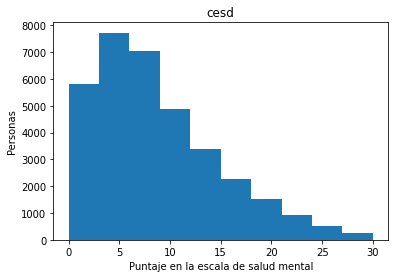

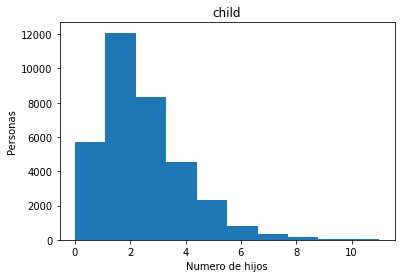

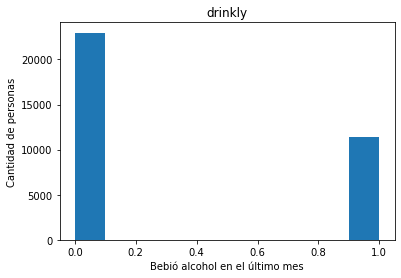

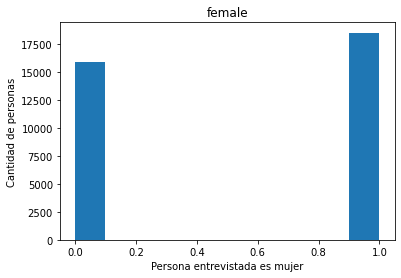

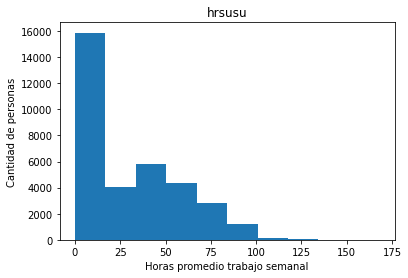

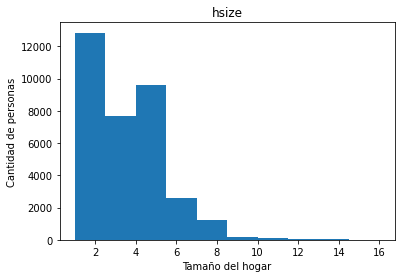

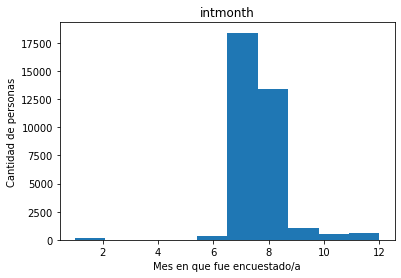

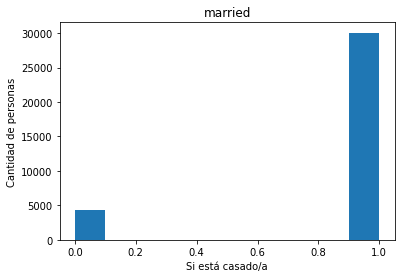

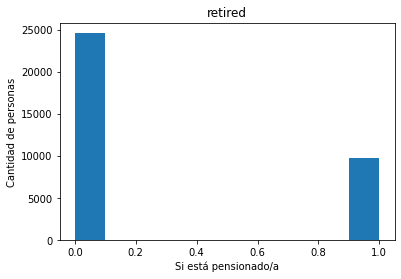

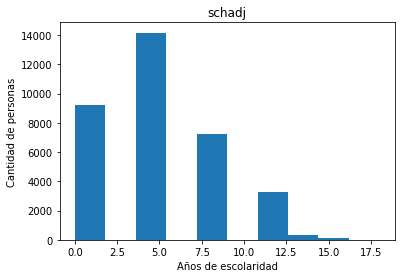

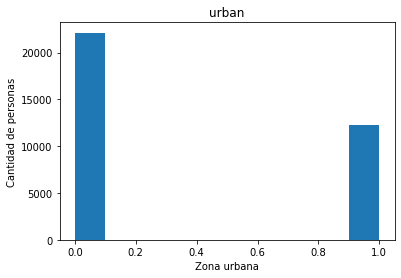

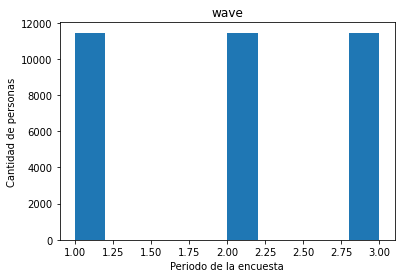

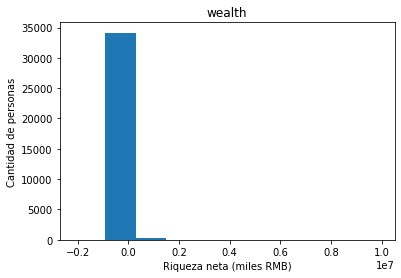

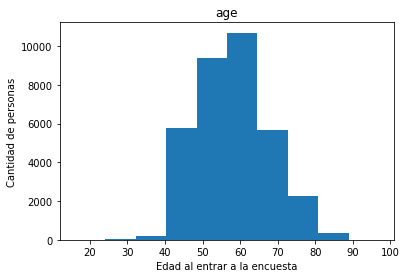

In [174]:
plt.hist(ch.cesd)
plt.title(ch.columns.values[0])
plt.xlabel('Puntaje en la escala de salud mental')
plt.ylabel('Personas')
plt.show()

plt.hist(ch.child)
plt.title(ch.columns.values[1])
plt.xlabel('Numero de hijos')
plt.ylabel('Personas')
plt.show()

plt.hist(ch.drinkly)
plt.title(ch.columns.values[2])
plt.xlabel('Bebió alcohol en el último mes')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.female)
plt.title(ch.columns.values[3])
plt.xlabel('Persona entrevistada es mujer')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.hrsusu)
plt.title(ch.columns.values[4])
plt.xlabel('Horas promedio trabajo semanal')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.hsize)
plt.title(ch.columns.values[5])
plt.xlabel('Tamaño del hogar')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.intmonth	)
plt.title(ch.columns.values[7])
plt.xlabel('Mes en que fue encuestado/a')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.married)
plt.title(ch.columns.values[8])
plt.xlabel('Si está casado/a')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.retired	)
plt.title(ch.columns.values[9])
plt.xlabel('Si está pensionado/a')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.schadj)
plt.title(ch.columns.values[10])
plt.xlabel('Años de escolaridad')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.urban)
plt.title(ch.columns.values[11])
plt.xlabel('Zona urbana')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.wave)
plt.title(ch.columns.values[12])
plt.xlabel('Periodo de la encuesta')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.wealth)
plt.title(ch.columns.values[13])
plt.xlabel('Riqueza neta (miles RMB)')
plt.ylabel('Cantidad de personas')
plt.show()

plt.hist(ch.age )
plt.title(ch.columns.values[14])
plt.xlabel('Edad al entrar a la encuesta')
plt.ylabel('Cantidad de personas')
plt.show()

## Anexo 2: Gráficos para detección de outliers


In [175]:
import plotly.express as px
fig1 = px.histogram(c, x="age", marginal="box",color_discrete_sequence=['green'],height=500,width=700)
fig1.show()
fig1 = px.histogram(c, x="cesd", marginal="box",color_discrete_sequence=['brown'],height=500,width=700)
fig1.show()
fig1 = px.histogram(c, x="hrsusu", marginal="box",color_discrete_sequence=['magenta'],height=500,width=700)
fig1.show()
fig1 = px.histogram(c, x="intmonth", marginal="box",color_discrete_sequence=['blue'],height=500,width=700)
fig1.show()
fig1 = px.histogram(c, x="schadj", marginal="box",color_discrete_sequence=['red'],height=500,width=700)
fig1.show()
fig1 = px.histogram(c, x="wealth", marginal="box",color_discrete_sequence=['black'],height=500,width=700)
fig1.show()
fig1 = px.histogram(c, x="child", marginal="box",color_discrete_sequence=['gray'],height=500,width=700)
fig1.show()
fig1 = px.histogram(c, x="hsize", marginal="box",color_discrete_sequence=['orange'],height=500,width=700)
fig1.show()